# **Week 1**

- Coding and visualizing simple quantum circuits  
- Measuring and Quantifying Probabilities vs. Shot Count
- Generating Arbitrary Probabilities
- Generating and Measuring Bell States

**1. Coding and visualizing simple quantum circuits**

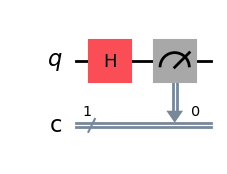

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
 
# Create a new circuit with one
qc = QuantumCircuit(1,1)
 
# Add a Hadamard gate to qubit 0
qc.h(0)

qc.measure(range(1), range(1))
qc.draw("mpl")

Quantum Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


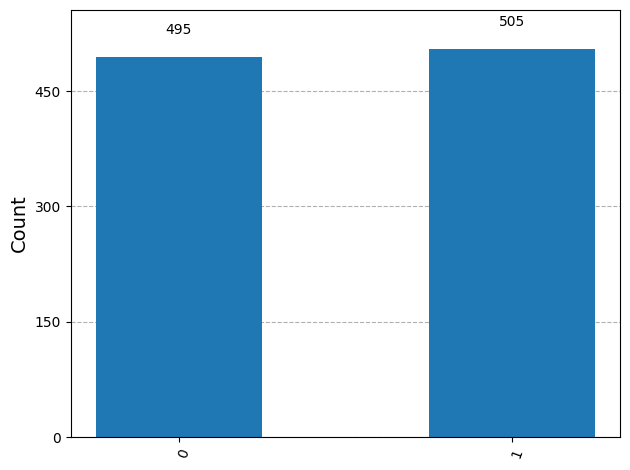

In [2]:
print("Quantum Circuit:")
print(qc)

# Simulate using Aer simulator
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

# Get counts
counts = result.get_counts()

plot_histogram(counts)

*Note on results*

A simple hadamard gate creates a $|+\rangle$ state, which has equal probabilities of collapsing into the $|0\rangle$ and $|1\rangle$ state upon measurement.

**2. Measuring and Quantifying Probabilities vs. Shot Count**

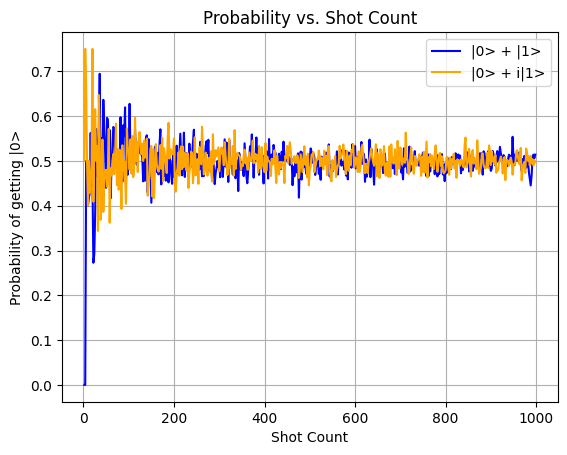

In [ ]:
# Probability and Shot Count for 1/sqrt{2} (|0> + |1>) state
sc = QuantumCircuit(1,1)
sc.h(0)
sc.measure(0,0)

# Probability and Shot Count for 1/sqrt{2} (|0> + i|1>) state
sc2 = QuantumCircuit(1,1)
sc2.h(0)
sc2.s(0)
sc2.measure(0,0)

# Simulator setup
simulator = Aer.get_backend('aer_simulator')

# Measurement of probabilities vs. shot count
total_plot1 = []
total_plot2 = []
for i in range(2,1000, 2):
    compiled_circuit = transpile(sc, simulator)
    job = simulator.run(compiled_circuit, shots=i)
    result = job.result()
    counts = result.get_counts()

    compiled_circuit2 = transpile(sc2, simulator)
    job2 = simulator.run(compiled_circuit2, shots=i)
    result2 = job2.result()
    counts2 = result2.get_counts()

    try:
        total_plot1.append(counts['0']/i)
    except:
        total_plot1.append(1-counts['1']/i)
    try:
        total_plot2.append(counts2['0']/i)
    except:
        total_plot2.append(1-counts2['1']/i)

# Plotting data
plt.plot(range(2,1000, 2), total_plot1, label='|0> + |1>', color='blue')
plt.plot(range(2,1000, 2), total_plot2, label='|0> + i|1>', color='orange')
plt.xlabel('Shot Count')
plt.ylabel('Probability of getting |0>')
plt.title('Probability vs. Shot Count')
plt.legend()
plt.grid()
plt.show()
    

*Note on results*

The probability of getting 0 starts out with a high variance but tends to 50% as the number of shots increases, as expected.

[[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0

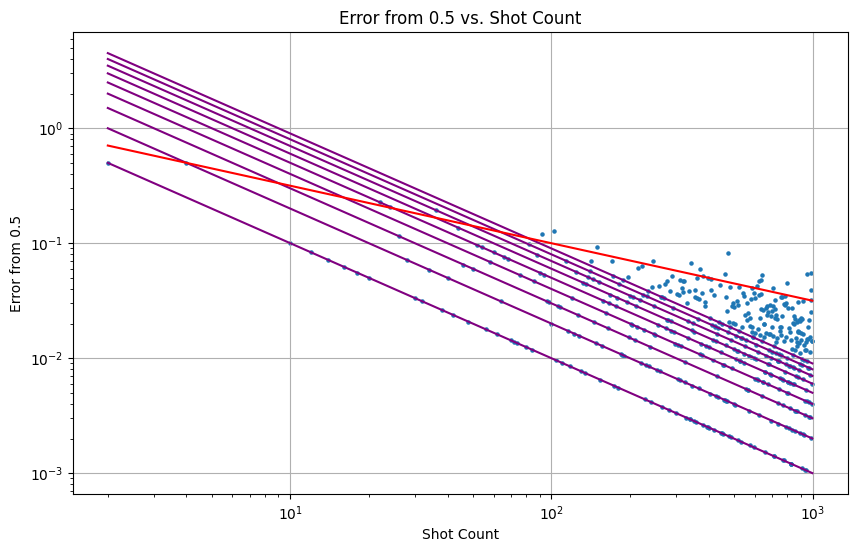

In [ ]:
import numpy as np
# Error Plot
# Error calculated by subtracting the probability from 0.5
errors = []
for i in range(len(total_plot1)):
    errors.append(abs(total_plot1[i] - 0.5))

plt.figure(figsize=(10, 6))
plt.title('Error from 0.5 vs. Shot Count')

# Plot the lines k/N
x_vals = np.arange(2, 1000, 2)
k = range(10)
y_vals = [[j / x for x in x_vals] for j in k]
print(y_vals)
for i, y in enumerate(y_vals):
    plt.plot(x_vals, y, label=f'y = (0.5 + {k[i]}) / x', color='purple')

# Plot the standard error line
plt.plot(x_vals, [1/(np.sqrt(x)) for x in x_vals], color='red')

# Scatterplot of rest of data
plt.scatter(range(2, 1000, 2), errors, s = 5)
plt.xlabel('Shot Count')
plt.ylabel('Error from 0.5')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()


*Note on results*

Since the plot is log-log, the perfect 50/50 points with zero error are off of the graph. From there, the bottommost "line" of points are cases one shot away from 50/50. The next line up is points two shots away from 50/50, and so on. All of these lines have a slope of negative one, since the function that describes them is (note that we're only considering even shot counts)
\begin{equation}
    y = 0.5 - \frac{N/2 - k}{N} = \frac{k}{N}
\end{equation}
where $N$ is the shot count and $k = 0, 1, 2, 3, \dots$ (if we also considered odd numbers, $k$ would increase in increments of $0.5$). A few of these lines are plotted in purple. If we look at the top of the "wedge," where most of the points are, the trend has an approximate slope of $-1/2$ on account of the standard error having a $SE \propto 1/\sqrt{N}$ relation. That relation is plotted in red.

**Generating Arbitrary Probabilities**

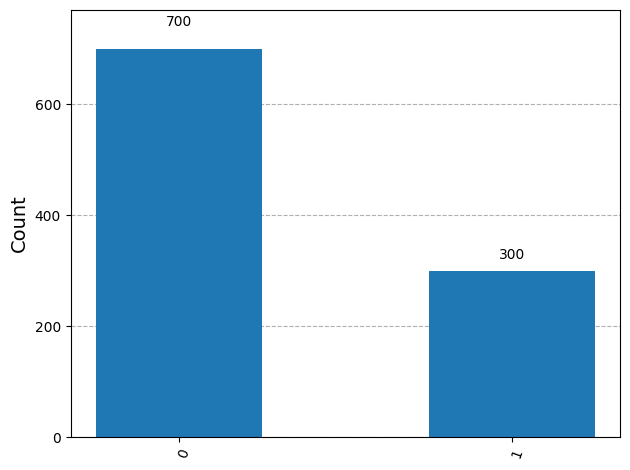

In [43]:
import numpy as np

p = 0.70 # Probability of measuring |0>
theta = 2 * np.arccos(np.sqrt(p))

ap = QuantumCircuit(1)
ap.rx(theta, 0)
ap.measure_all()
ap.draw("mpl")

# Simulate the circuit
compiled_ap = transpile(ap, simulator)
job_ap = simulator.run(compiled_ap, shots=1000)
result_ap = job_ap.result()

# Graph Counts
counts_ap = result_ap.get_counts()
plot_histogram(counts_ap)

*Note on results*

Arbitrary probabilities are generated by rotating the statevector in the bloch sphere to a state that gives the proper probabilties. More specifically, for a state $|\psi\rangle = a|0\rangle + b|1\rangle$, the ratio $a/b$ represents the ratio of lengths that the projection of the statevector along the $Z$ splits the $Z$ axis into. From there, we can convert an arbitrary probability into an angle to rotate along the $X$ axis to place the qubit in the proper state.

**Generating and Measuring Bell States**

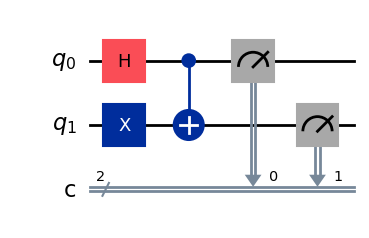

In [ ]:
# Simple Bell State Circuit that generates the state 1/sqert{2} (|01> + |10>)
simple_bell = QuantumCircuit(2, 2)
simple_bell.h(0)
simple_bell.x(1)
simple_bell.cx(0, 1)
simple_bell.measure([0, 1], [0, 1])
simple_bell.draw("mpl")

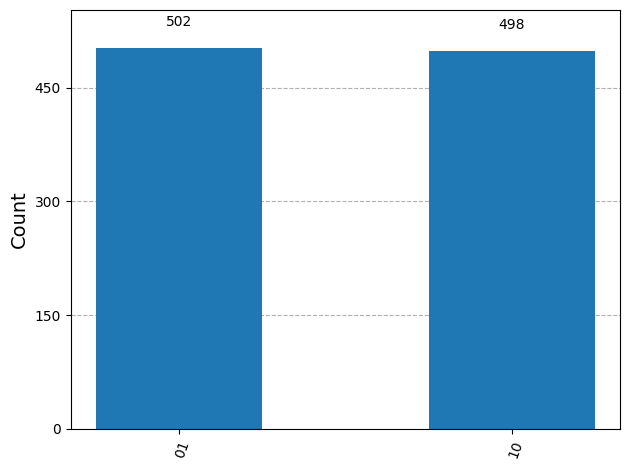

In [ ]:
# Plotting above entangled state
compiled_simple_bell = transpile(simple_bell, simulator)
job_simple_bell = simulator.run(compiled_simple_bell, shots=1000)
result_simple_bell = job_simple_bell.result()
counts_simple_bell = result_simple_bell.get_counts()

plot_histogram(counts_simple_bell)

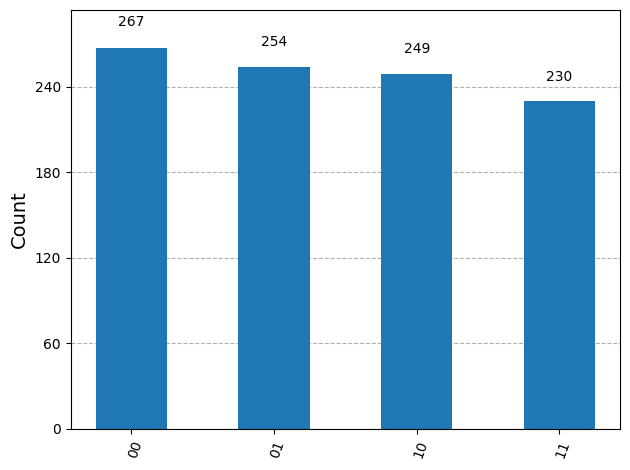

In [75]:
# Bell state circuit that generates |+>|+> state
bell_plus = QuantumCircuit(2, 2)
bell_plus.h(0)
bell_plus.h(1)
bell_plus.x(1)
bell_plus.cx(0, 1)
bell_plus.measure([0, 1], [0, 1])
bell_plus.draw("mpl")

# Plotting above entangled state
compiled_bell_plus = transpile(bell_plus, simulator)
job_bell_plus = simulator.run(compiled_bell_plus, shots=1000)
result_bell_plus = job_bell_plus.result()
counts_bell_plus = result_bell_plus.get_counts()
plot_histogram(counts_bell_plus)

*Note on results*

In the Bell state, a CNOT gate is used to entangle qubits such that when one qubit is measured, the state of the other one can be instantly known. However, it only works for certain arrangements. If a CNOT gate is applied on the $|++\rangle$ state, there are still four possible outputs and the qubits aren't entangled.